## Blink Customer Data Management

Let's start from importing the dummy **dataset** with the columns assumptions:


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('Dataset_test.csv', low_memory = False)
df

,Merchant,Customer_id,Datetime,Blink_shipping,Cap_eligibility,Inventory_av_eligibility,New_to_blink,New_to_merch,Session_id,Order_id,Sku_id,Lineitem_quantity,Lineitem_price,Country,Shipping Zip,Shipping_price
0,Ketofood,pashke.ndoka@gmail.com,2022-02-22 08:48:14 +0100,0.0,1.0,1.0,0.0,0.0,#16074,#16074,47205925.0,1,16.95,IT,00119,0.00
1,NaN,pashke.ndoka@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,#16074,#16074,4320592.0,2,23.95,NaN,NaN,NaN
2,Ketofood,cristinabotti@virgilio.it,2022-02-22 07:50:19 +0100,0.0,0.0,1.0,1.0,0.0,#16073,#16073,47205925.0,1,16.95,IT,50013,3.99
3,Ketofood,guendalina_3@libero.it,2022-02-22 05:53:08 +0100,0.0,0.0,1.0,0.0,1.0,#16072,#16072,4230592.0,4,9.99,IT,60027,3.99
4,Ketofood,eloisasofia@hotmail.it,2022-02-21 23:18:00 +0100,0.0,0.0,0.0,1.0,1.0,#16071,#16071,46105929.0,1,95.28,IT,98034,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35343,FitPorn,robbymichielan@hotmail.com,2020-10-01 07:48:10 +0200,NaN,0.0,0.0,1.0,1.0,omrobbbbymichi,NaN,NaN,1,55.79,IT,31021,4.99
35344,FitPorn,salvatore.beneventovitalenigro@gmail.com,2020-10-01 06:46:54 +0200,NaN,1.0,0.0,1.0,0.0,omsalvlvatore.,NaN,NaN,1,8.99,IT,42046,4.99
35345,NaN,salvatore.beneventovitalenigro@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,omsalvlvatore.,NaN,NaN,1,4.99,NaN,NaN,NaN
35346,NaN,salvatore.beneventovitalenigro@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,omsalvlvatore.,NaN,NaN,1,9.70,NaN,NaN,NaN


Then let's create two dataframes:

- The first will contain only completed orders
- The second will contain all the sessions (in which are also included the completed ones that converted into orders)

In [2]:
#Orders dataframe
orders = df.groupby(['Order_id', 'Merchant', 'Customer_id', 'Datetime', 'Country', 'Shipping Zip']).agg({
    'Blink_shipping': 'sum',
    'Cap_eligibility': 'sum',
    'Inventory_av_eligibility': 'sum',
    'New_to_blink': 'sum',
    'New_to_merch': 'sum',
    'New_to_blink': 'sum',
    'Lineitem_quantity': 'sum',
    'Lineitem_price': 'sum',
    'Shipping_price': 'max'
}).reset_index()

#Sessions dataframe
sessions = df.groupby(['Session_id', 'Merchant', 'Customer_id', 'Datetime', 'Country', 'Shipping Zip']).agg({
    'Blink_shipping': 'sum',
    'Cap_eligibility': 'sum',
    'Inventory_av_eligibility': 'sum',
    'New_to_blink': 'sum',
    'New_to_merch': 'sum',
    'New_to_blink': 'sum',
    'Lineitem_quantity': 'sum',
    'Lineitem_price': 'sum',
    'Shipping_price': 'max'
}).reset_index()

#Add time columns
orders['date'] = pd.to_datetime(orders.Datetime, errors = 'coerce', utc = 'true').dt.date
orders['day_of_week'] = pd.to_datetime(orders.Datetime, errors = 'coerce', utc = 'true').dt.day_name()
orders['hour_of_day'] = pd.to_datetime(orders.Datetime, errors = 'coerce', utc = 'true').dt.hour
orders['month_name'] = pd.to_datetime(orders.Datetime, errors = 'coerce', utc = 'true').dt.month_name()
orders['year_num'] = pd.to_datetime(orders.Datetime, errors = 'coerce', utc = 'true').dt.year
orders['month_code'] = orders.month_name.str.slice(start = 0, stop = 3)
orders['year_code'] = orders.year_num.apply(lambda x: str(x)[2:])
orders['ym_code'] = orders.year_code + orders.month_code
orders['week_num'] = pd.to_datetime(orders.Datetime, errors = 'coerce', utc = 'true').dt.week
orders['yw_code'] = orders.year_code.astype(str) + orders.week_num.astype(str)

sessions['date'] = pd.to_datetime(sessions.Datetime, errors = 'coerce', utc = 'true').dt.date
sessions['day_of_week'] = pd.to_datetime(sessions.Datetime, errors = 'coerce', utc = 'true').dt.day_name()
sessions['hour_of_day'] = pd.to_datetime(sessions.Datetime, errors = 'coerce', utc = 'true').dt.hour
sessions['month_name'] = pd.to_datetime(sessions.Datetime, errors = 'coerce', utc = 'true').dt.month_name()
sessions['year_num'] = pd.to_datetime(sessions.Datetime, errors = 'coerce', utc = 'true').dt.year
sessions['month_code'] = sessions.month_name.str.slice(start = 0, stop = 3)
sessions['year_code'] = sessions.year_num.apply(lambda x: str(x)[2:])
sessions['ym_code'] = sessions.year_code + orders.month_code
sessions['week_num'] = pd.to_datetime(sessions.Datetime, errors = 'coerce', utc = 'true').dt.week
sessions['yw_code'] = sessions.year_code.astype(str) + sessions.week_num.astype(str)

C:\Users\Giuseppe\AppData\Local\Temp/ipykernel_13924/515121555.py:36: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  orders['week_num'] = pd.to_datetime(orders.Datetime, errors = 'coerce', utc = 'true').dt.week
C:\Users\Giuseppe\AppData\Local\Temp/ipykernel_13924/515121555.py:47: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  sessions['week_num'] = pd.to_datetime(sessions.Datetime, errors = 'coerce', utc = 'true').dt.week


Then the two dataframes can be filtered using to the parameters below:

In [3]:
#Parameters {for multiple values use a list [item1, item2]}

country_list = ['IT']
merchant_list = ['Ketofood']
date_start = '2021-01-01'
date_end = '2022-02-01'
day_of_week_list = ['Monday', 'Tuesday']
hod_start = 1
hod_end = 24

date_start = pd.to_datetime(date_start)
date_end = pd.to_datetime(date_end)

If you don't wanna use specific filters, just comment the line of code (below) where that filter is. You can do that by using '#'

In [4]:
orders_filtered = orders[
    orders.Country.isin(country_list) 
    & orders.Merchant.isin(merchant_list) 
    & (orders.date >= date_start) 
    & (orders.date < date_end) 
    & (orders.day_of_week.isin(day_of_week_list))
    & (orders.hour_of_day >= hod_start) 
    & (orders.hour_of_day < hod_end)
    ].reset_index(drop = True)

sessions_filtered = sessions
# [
#     orders.Country.isin(country_list) 
#     & orders.Merchant.isin(merchant_list) 
#     & (orders.date >= date_start) 
#     & (orders.date < date_end) 
#     & (orders.day_of_week.isin(day_of_week_list))
#     & (orders.hour_of_day >= hod_start) 
#     & (orders.hour_of_day < hod_end)
#     ].reset_index(drop = True)

C:\Users\Giuseppe\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


## KPIs

### 1. Percentage of eligible orders
Description: number of orders where Blink is shown at checkout divided by the total number of orders

,Cap_eligibility,Inventory_av_eligibility,Order_id,Percent
0,0.0,0.0,303,0.235248
1,0.0,1.0,319,0.247671
2,1.0,0.0,328,0.254658
3,1.0,1.0,338,0.262422


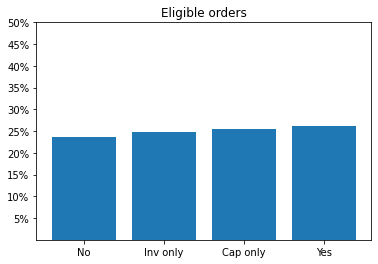


Eligible orders are 0.26242236024844723 of the total


In [5]:
perc_serv_ord = orders_filtered.groupby(['Cap_eligibility', 'Inventory_av_eligibility']).Order_id.count().reset_index()
perc_serv_ord['Percent'] = perc_serv_ord.Order_id / perc_serv_ord.Order_id.sum()

display(perc_serv_ord)

ax = plt.subplot()
plt.bar(range(len(perc_serv_ord.Cap_eligibility)), perc_serv_ord.Percent)
ax.set_xticks(range(len(perc_serv_ord)))
ax.set_xticklabels(['No', 'Inv only', 'Cap only', 'Yes'])
ax.set_yticks([0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
ax.set_yticklabels(['5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%', '45%', '50%'])
plt.title('Eligible orders')

plt.show()

print("\nEligible orders are " + str(perc_serv_ord.Percent[3]) + ' of the total')

### 2. **Percentage of Blink Selection Rate**

Description: % of people chosing Blink’s option when it is available at checkout.

Recalling the **number of elibigle orders** of Blink from the previous section:

In [6]:
display(perc_serv_ord)

print("The number of eligible orders for blink are:", perc_serv_ord.Order_id[3])

,Cap_eligibility,Inventory_av_eligibility,Order_id,Percent
0,0.0,0.0,303,0.235248
1,0.0,1.0,319,0.247671
2,1.0,0.0,328,0.254658
3,1.0,1.0,338,0.262422


The number of eligible orders for blink are: 338


Here we're going to find the number of **shipping made with Blink**

,Blink_shipping,Order_id,Percent
0,0.0,1272,0.987578
1,1.0,16,0.012422


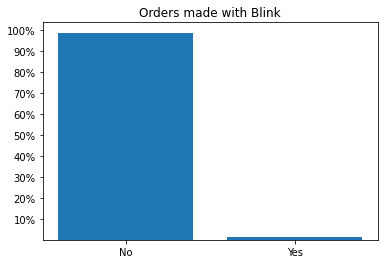

The number of orders made with blink are: 16


In [7]:
blink_shipp_choice = orders_filtered.groupby(['Blink_shipping']).Order_id.count().reset_index()

blink_shipp_choice['Percent'] = blink_shipp_choice.Order_id / blink_shipp_choice.Order_id.sum()

display(blink_shipp_choice)

ax = plt.subplot()

plt.bar(range(len(blink_shipp_choice.Blink_shipping)), blink_shipp_choice.Percent)
ax.set_xticks(range(len(blink_shipp_choice)))
ax.set_xticklabels(['No','Yes'])
ax.set_yticks([0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1])
ax.set_yticklabels(['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.title('Orders made with Blink')
plt.show()

print("The number of orders made with blink are:", blink_shipp_choice.Order_id[1])

In [8]:
selection_rate = ( blink_shipp_choice.Order_id[1] / perc_serv_ord.Order_id[3])

print("The selection rate of Blink is:", selection_rate)

The selection rate of Blink is: 0.047337278106508875


### 3. **Increase or decrease in average basket size**
Description: **Ratio between the basket size** of customers using Blink and Non-Blink. 

In [9]:
cart_quantity_customer = orders.groupby('Blink_shipping').Lineitem_quantity.mean().reset_index()

cart_quantity_customer['Percent'] = cart_quantity_customer.Lineitem_quantity / cart_quantity_customer.Lineitem_quantity.sum()

display(cart_quantity_customer)

ratio_basket_size = cart_quantity_customer.Lineitem_quantity[1] / cart_quantity_customer.Lineitem_quantity[0]
print("The ratio of the basket size between Blink and non Blink is:", ratio_basket_size)

,Blink_shipping,Lineitem_quantity,Percent
0,0.0,1.587188,0.495982
1,1.0,1.612903,0.504018


The ratio of the basket size between Blink and non Blink is: 1.0162019233186044


Evolution over time:

In [10]:
ratio_rev_time = orders_filtered.groupby(['ym_code', 'Blink_shipping']).Lineitem_quantity.mean().reset_index()
prt_pivot = ratio_rev_time.pivot(
    columns = 'ym_code',
    index = 'Blink_shipping',
    values = 'Lineitem_quantity').reset_index()

display(prt_pivot)

ym_code,Blink_shipping,21Dec,21Nov,22Jan
0,0.0,1.440529,1.491694,1.446809
1,1.0,NaN,NaN,2.000000


The **ratio between the basket size in terms of price** of customers using Blink and Non-Blink. 

In [11]:
ratio_price_customer = orders.groupby('Blink_shipping').Lineitem_price.mean().reset_index()

display(ratio_price_customer)

ratio_basket_size_price = ratio_price_customer.Lineitem_price[1] / ratio_price_customer.Lineitem_price[0]
print("The ratio of the basket size (price) between Blink and non Blink is:", ratio_basket_size_price)

,Blink_shipping,Lineitem_price
0,0.0,17.789302
1,1.0,12.065000


The ratio of the basket size (price) between Blink and non Blink is: 0.6782165855720387


The **delta between the basket size in terms of price** of customers using Non-Blink and Blink. 

In [12]:
delta_price_customer = orders.groupby('Blink_shipping').Lineitem_price.mean().reset_index()

display(delta_price_customer)

delta_basket_size_price = delta_price_customer.Lineitem_price[1] - delta_price_customer.Lineitem_price[0]
print("The delta of the basket size (price) between Blink and non Blink is:", delta_basket_size_price)

,Blink_shipping,Lineitem_price
0,0.0,17.789302
1,1.0,12.065000


The delta of the basket size (price) between Blink and non Blink is: -5.724302498144942


### 4. Percentage of turnover through Blink orders
Description: revenue from Blink orders divided by the total revenue

,Blink_shipping,Lineitem_price,Percent
0,0.0,24867.41,0.990322
1,1.0,243.01,0.009678



Percentage of revenue through Blink is 0.009677655730170981


(-1.1036654276926332,
 1.1001745446728661,
 -1.1052261703244126,
 1.1021986928981802)

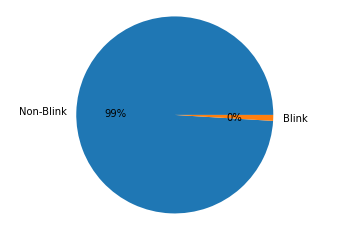

In [13]:
perc_rev = orders_filtered.groupby(['Blink_shipping']).Lineitem_price.sum().reset_index()
perc_rev['Percent'] = perc_rev.Lineitem_price / perc_rev.Lineitem_price.sum()

display(perc_rev)

print("\nPercentage of revenue through Blink is " + str(perc_rev.Percent[1]))

plt.pie(perc_rev.Lineitem_price, labels = ['Non-Blink', 'Blink'], autopct = '%d%%')
plt.axis('equal')

Evolution over time

In [14]:
perc_rev_time = orders_filtered.groupby(['ym_code', 'Blink_shipping']).Lineitem_price.sum().reset_index()
prt_pivot = perc_rev_time.pivot(
    columns = 'ym_code',
    index = 'Blink_shipping',
    values = 'Lineitem_price').reset_index()

display(prt_pivot)

ym_code,Blink_shipping,21Dec,21Nov,22Jan
0,0.0,8013.48,9965.3,6888.63
1,1.0,NaN,NaN,243.01


### 5. Percentage increase on Conversion Rate
Description: Ratio between Conversion Rate w/ Blink and Conversion Rate w/out Blink.

,Blink_shown,Order_id,Session_id,conversion
0,0,950,10675,0.088993
1,1,338,3592,0.094098



Percentage increase is 0.057364318368303746


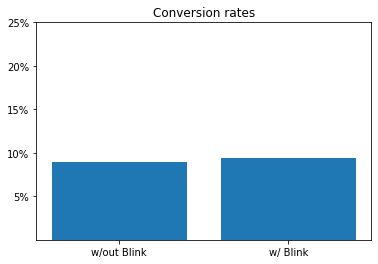

In [15]:
def f(cap, inv):
    if (cap == 1) & (inv == 1):
        return 1
    else:
        return 0

orders_new = orders_filtered
orders_new['Blink_shown'] = orders_new.apply(lambda x: f(x.Cap_eligibility, x.Inventory_av_eligibility), axis = 1)

sessions_new = sessions_filtered
sessions_new['Blink_shown'] = sessions_new.apply(lambda x: f(x.Cap_eligibility, x.Inventory_av_eligibility), axis = 1)

conversions = orders_new.groupby('Blink_shown').Order_id.count().reset_index()
totals = sessions_new.groupby('Blink_shown').Session_id.count().reset_index()
ratios = conversions.merge(totals, how = 'left')
ratios['conversion'] = ratios.Order_id / ratios.Session_id

display(ratios)
print("\nPercentage increase is " + str((ratios.conversion[1] - ratios.conversion[0]) / ratios.conversion[0]))

ax = plt.subplot()
plt.bar(range(len(ratios.conversion)), ratios.conversion)
ax.set_xticks(range(len(ratios)))
ax.set_xticklabels(['w/out Blink', 'w/ Blink'])
ax.set_yticks([0.05, 0.10, 0.15, 0.20, 0.25])
ax.set_yticklabels(['5%', '10%', '15%', '20%', '25%'])
plt.title('Conversion rates')
plt.show()

Evolution over time:

In [16]:
conversions_time = orders_new.groupby(['ym_code', 'Blink_shown']).Order_id.count().reset_index()
totals_time = sessions_new.groupby(['ym_code', 'Blink_shown']).Session_id.count().reset_index()
ratios_time = pd.merge(conversions_time, totals_time, how = 'outer', on = ['ym_code', 'Blink_shown'])
ratios_time['conversion'] = ratios_time.Order_id / ratios_time.Session_id

display(ratios_time)

,ym_code,Blink_shown,Order_id,Session_id,conversion
0,21Dec,0,343.0,676,0.507396
1,21Dec,1,111.0,213,0.521127
2,21Nov,0,227.0,620,0.366129
3,21Nov,1,74.0,192,0.385417
4,22Jan,0,380.0,923,0.411701
5,22Jan,1,153.0,343,0.446064
6,22Feb,0,NaN,836,NaN
7,22Feb,1,NaN,302,NaN
